In [1]:
## check availability of GPU (nvidia-smi)
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-32GB, compute capability 7.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os 
import glob

current_dir = "/mnt/akoustos/"

data_dir = current_dir + "Data/"
labeled_data_dir = data_dir + 'Labeled_Data/'
audio_dir = data_dir + "Raw_Audio/"

spectrogram_dir = data_dir + "Extracted_Spectrogram/"
if not os.path.exists(spectrogram_dir):
    os.makedirs(spectrogram_dir)


In [4]:
from src.data_split import Data_Split
categories = ['25', '14', '4949']  ## regard the remaining labeled detections with other labels as "non-category" (i.e., negatives)
data = Data_Split.data_split(categories, spectrogram_dir, include_no_label_category = False)
print(data.head(10))

   label  Count  Percentage
0  -9999    789       34.45
1     14    500       21.83
2     25    500       21.83
3   4949    501       21.88
Size of train, val, test dataset: 1602 344 344
Percentage of train, val, test dataset: 70.0% 15.0% 15.0%
                                            filename  label  split
0  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  -9999  train
1  /mnt/akoustos/Data/Extracted_Spectrogram/proje...   4949  train
2  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25  train
3  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25  train
4  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25  train
5  /mnt/akoustos/Data/Extracted_Spectrogram/proje...   4949    val
6  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25   test
7  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  -9999    val
8  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25  train
9  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25  train


### Train with a Customized CNN 

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 175.32569 | Val Loss: 73.18963 | Train Acc: 0.270| Val Acc: 0.230
Epoch 02: | Train Loss: 38.79048 | Val Loss: 29.63720 | Train Acc: 0.369| Val Acc: 0.372
Epoch 03: | Train Loss: 17.50828 | Val Loss: 24.92705 | Train Acc: 0.546| Val Acc: 0.570
Epoch 04: | Train Loss: 10.89254 | Val Loss: 3.18313 | Train Acc: 0.654| Val Acc: 0.765
Epoch 05: | Train Loss: 4.70050 | Val Loss: 9.87718 | Train Acc: 0.689| Val Acc: 0.666
Epoch 06: | Train Loss: 9.29716 | Val Loss: 2.52711 | Train Acc: 0.660| Val Acc: 0.773
Epoch 07: | Train Loss: 2.04682 | Val Loss: 1.73994 | Train Acc: 0.749| Val Acc: 0.767
Epoch 08: | Train Loss: 1.77732 | Val Loss: 3.33393 | Train Acc: 0.767| Val Acc: 0.552
Epoch 09: | Train Loss: 2.31399 | Val Loss: 1.64023 | Train Acc: 0.726

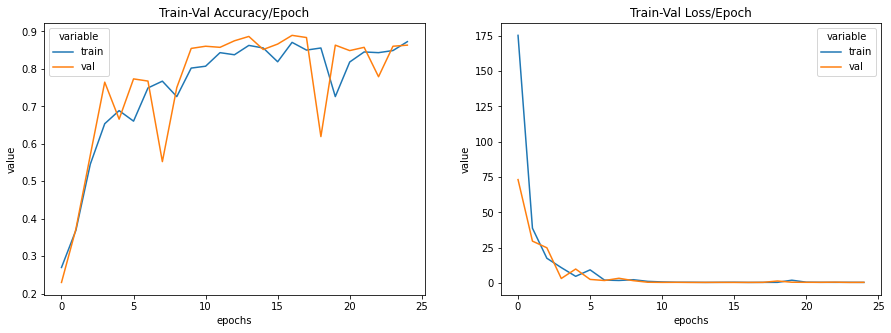

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       112
           1       0.96      0.84      0.89        80
           2       0.85      0.93      0.89        91
           3       0.73      0.92      0.81        61

    accuracy                           0.86       344
   macro avg       0.86      0.87      0.86       344
weighted avg       0.88      0.86      0.86       344

Confusion matrix on testset:
             pred: -9999  pred: 14  pred: 25  pred: 4949
true: -9999           89         2         9          12
true: 14               2        67         5           6
true: 25               3         0        85           3
true: 4949             3         1         1          56


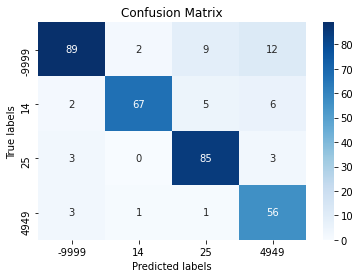

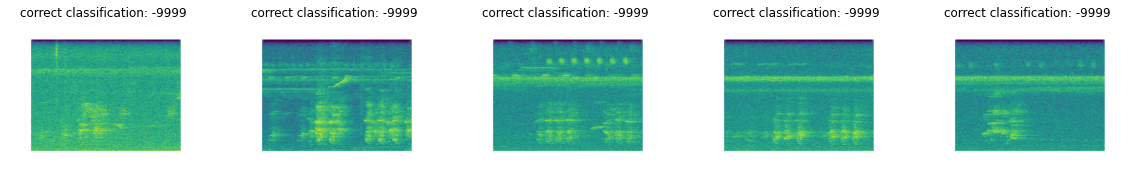

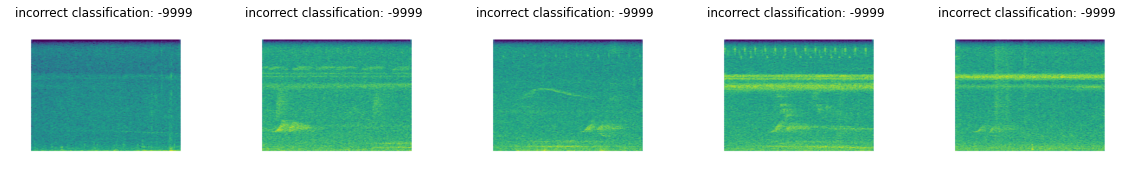

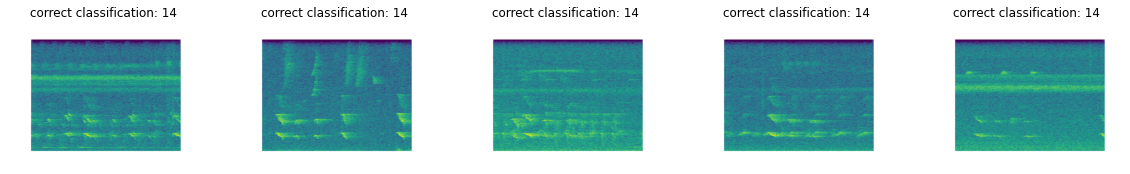

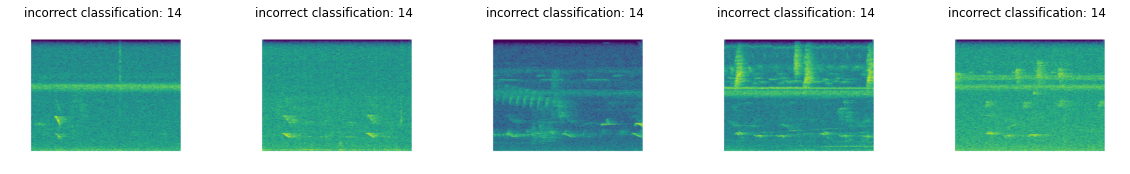

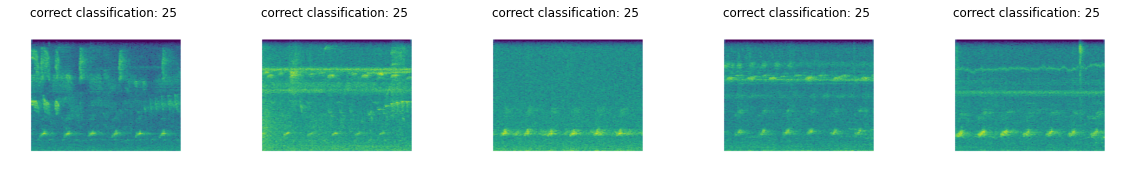

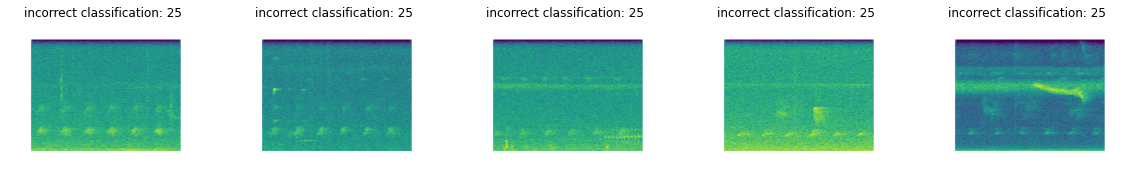

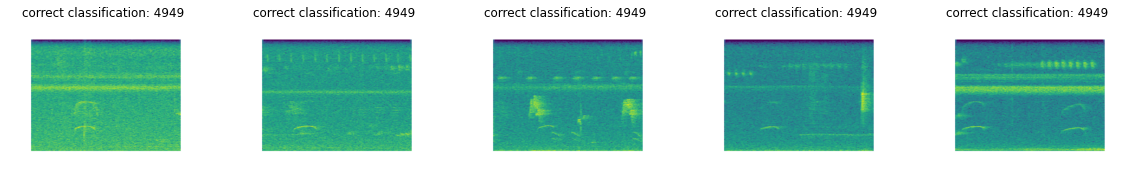

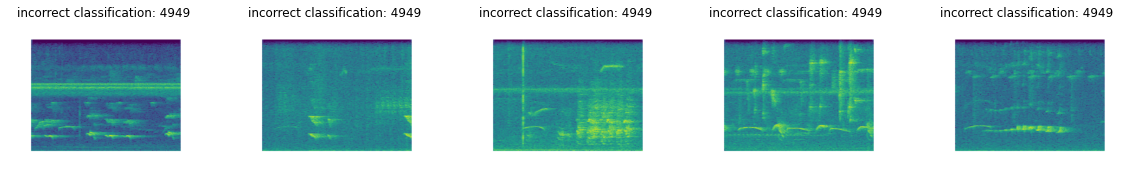

In [5]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                     model_name = 'Customized_CNN', 
                                                     batch_size = 32,  
                                                     optimizer = 'Adam', 
                                                     learning_rate = 0.008, 
                                                     lr_decay = False, 
                                                     num_epochs = 25)


### Fine-tune a pre-trained model

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 1.21582 | Val Loss: 0.49095 | Train Acc: 0.828| Val Acc: 0.916
Epoch 02: | Train Loss: 0.38389 | Val Loss: 0.38785 | Train Acc: 0.914| Val Acc: 0.927
Epoch 03: | Train Loss: 0.36926 | Val Loss: 0.38059 | Train Acc: 0.929| Val Acc: 0.939
Epoch 04: | Train Loss: 0.39556 | Val Loss: 0.47878 | Train Acc: 0.918| Val Acc: 0.916
Epoch 05: | Train Loss: 0.33156 | Val Loss: 0.45259 | Train Acc: 0.934| Val Acc: 0.922
Epoch 06: | Train Loss: 0.37990 | Val Loss: 0.49018 | Train Acc: 0.919| Val Acc: 0.916
Epoch 07: | Train Loss: 0.36182 | Val Loss: 0.45866 | Train Acc: 0.921| Val Acc: 0.916
Epoch 08: | Train Loss: 0.36908 | Val Loss: 0.42806 | Train Acc: 0.924| Val Acc: 0.919
Epoch 09: | Train Loss: 0.36883 | Val Loss: 0.41576 | Train Acc: 0.923| Val Ac

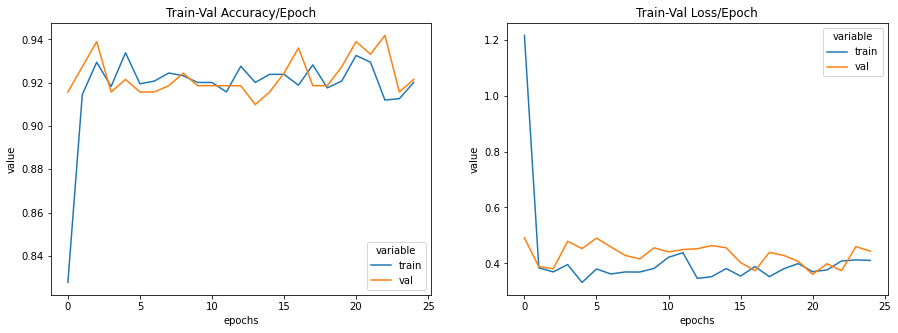

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       112
           1       0.92      0.85      0.88        80
           2       0.94      0.99      0.96        91
           3       0.98      0.92      0.95        61

    accuracy                           0.94       344
   macro avg       0.94      0.93      0.93       344
weighted avg       0.94      0.94      0.94       344

Confusion matrix on testset:
             pred: -9999  pred: 14  pred: 25  pred: 4949
true: -9999          108         2         1           1
true: 14               7        68         5           0
true: 25               1         0        90           0
true: 4949             1         4         0          56


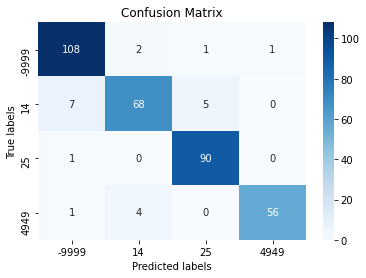

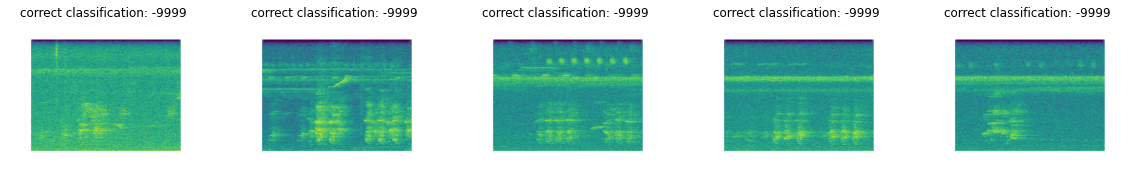

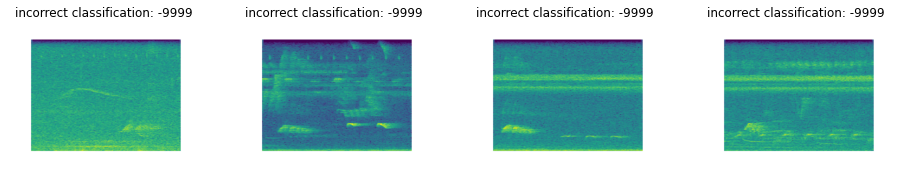

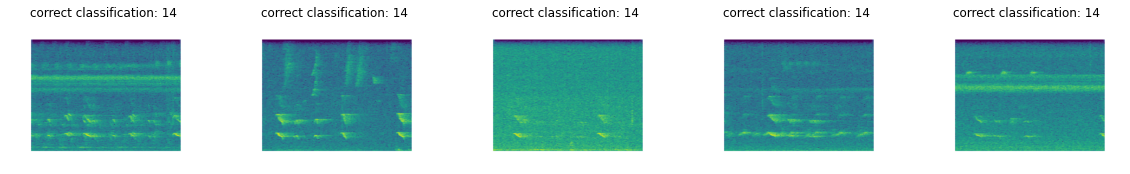

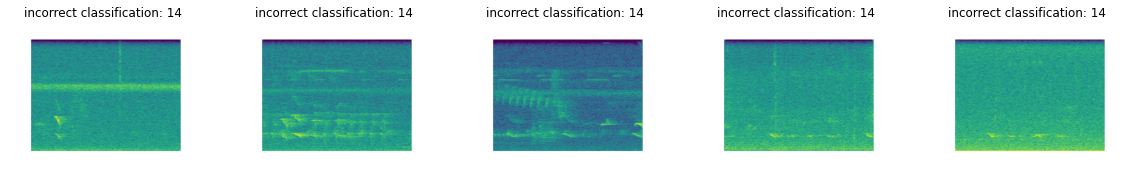

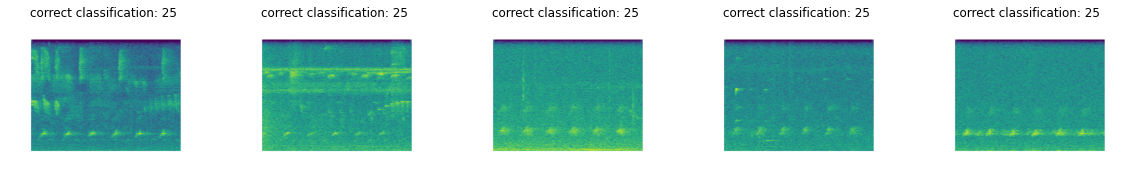

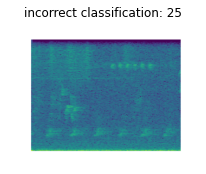

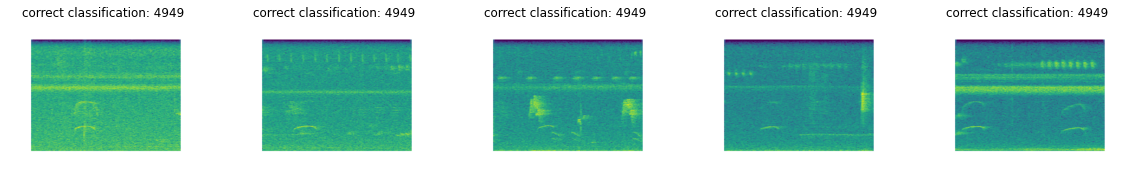

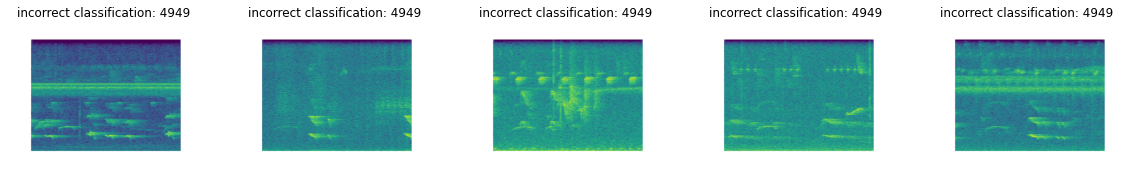

In [6]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                 model_name = 'Resnet18', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.0005, 
                                                 lr_decay = True, 
                                                 num_epochs = 25)
